In [ ]:
# %%
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import scipy.linalg as LA

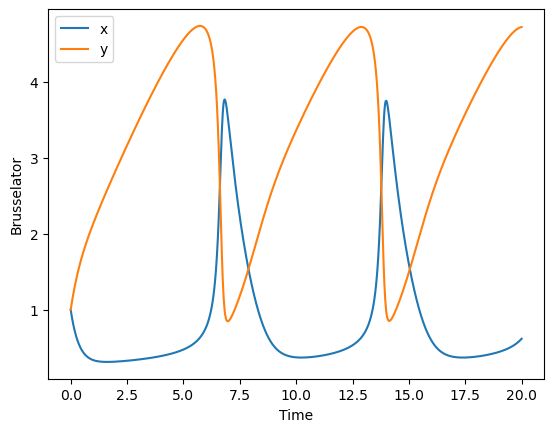

In [ ]:
# %%

#a)
# For B = 3, use a numerical integrator to calculate the solution for 0 ≤ t ≤ 20
# with initial conditions x(0) = 1 and y(0) = 1. Plot the resulting time series as the
# trajectory converges onto a limit cycle, showing both x and y against t.

from Equations_Functions import brusselator
from ode_solver import solve_ode

pars = [3] # B (A is fixed = 1)
y0 = np.array([1, 1])
T = 20
t = np.linspace(0, T, 1000)
sol = solve_ode(brusselator, y0, t, "rk4", 0.05, pars)
plt.plot(t, sol[0, :], label='x')
plt.plot(t, sol[1, :], label='y')
plt.xlabel('Time')
plt.ylabel('Brusselator')
plt.legend()
plt.show()

The starting point: 0.37, 3.51 values and period: 7.16 for the Brusselator orbit


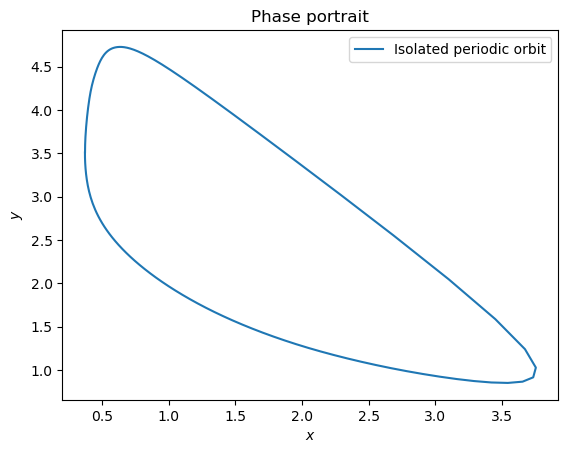

In [ ]:
# %%

#b)
# For B = 3, use numerical shooting along with a suitable phase condition to identify
# the coordinates of a starting point along the limit cycle. Determine the oscillation
# period to two decimal places.
from scipy.optimize import fsolve
from bvp_and_shooting import phase_condition, shoot, limit_cycle_finder, phase_portrait_plotter, orbit


pars = [3] #A & B
y0 = np.array([2,3,7])
sol = limit_cycle_finder(brusselator, y0,phase_condition,pars,test=False)
cycle = orbit(brusselator, sol[:-1], sol[-1], pars)
print(f'The starting point: {", ".join([f"{val:.2f}" for val in sol[:-1]])} values and period: {sol[-1]:.2f} for the Brusselator orbit')
fig1 = phase_portrait_plotter(cycle) #plot the limit cycle
plt.show()

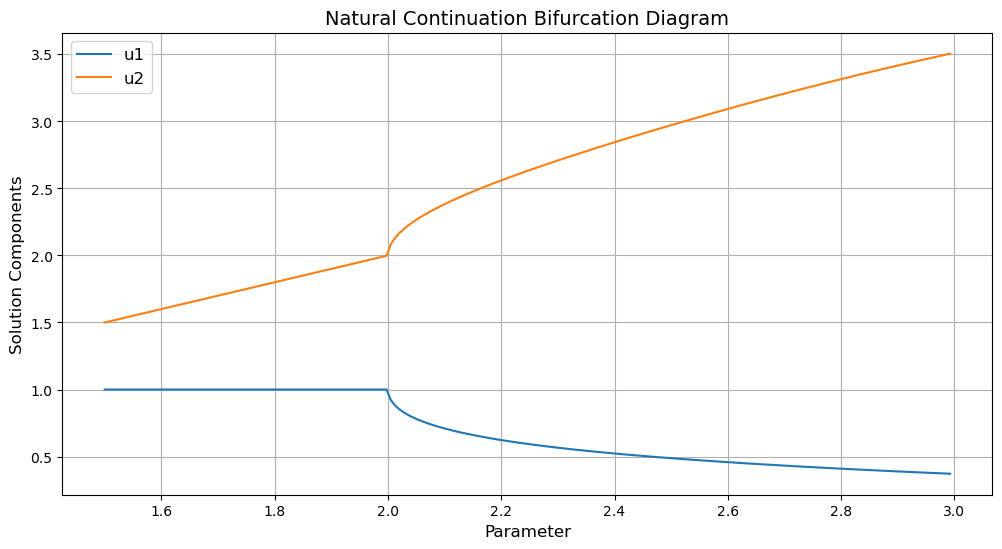

In [ ]:
# %%

# (c) For 2 ≤ B ≤ 3, use natural-parameter continuation to find the branch of limit cycles
# that emerge from the Hopf bifurcation at B = 2.
from numerical_continuation import numerical_continuation, natural_plotter

x0 = np.array([0.37, 3.5, 7.15])    
par_array = [3]  # Start parameter value
par_index = 0

par_nat, sol_nat = numerical_continuation(brusselator, 
    'natural', 
    x0, 
    par_array, 
    par_index, 
    [3, 1.5], #Bounds
    [200, 30], #Max steps: [PAL, Natural]
    shoot, #discretization
    fsolve, #solver
    phase_condition=phase_condition, 
    increase=False) #increase parameter


# #Bifurcation diagram of Limit cycle and equilibria
#If theres a period, we dont want to plot T, so we set period=True to exclude it
natural_plotter(par_nat, sol_nat, period=True)
#add titles n shiz

Parameter boundary reached or exceeded.


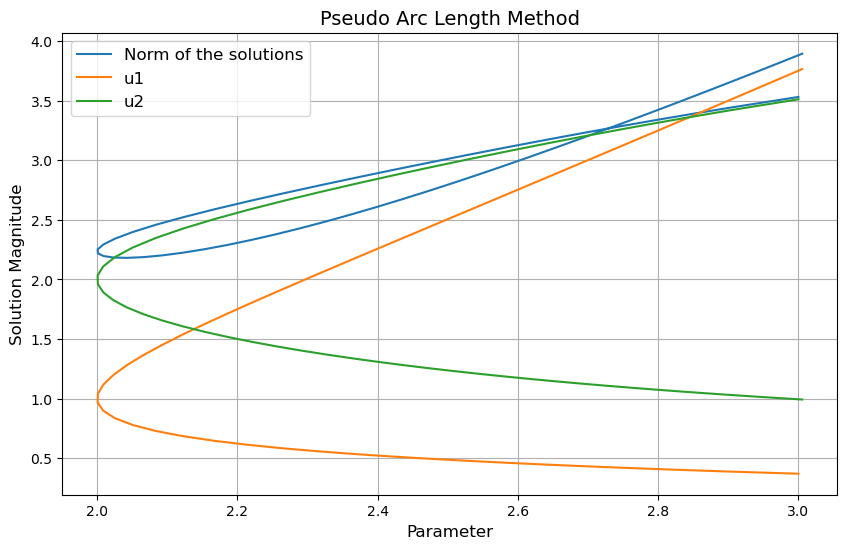

In [ ]:
# %%

# Pseudo Arc Length - verify that natural continuation is working and PAL is working (It is)
from numerical_continuation import pseudo_plotter


par_pseudo, sol_pseudo = numerical_continuation(brusselator, 
    'pseudo', 
    x0, 
    par_array, 
    par_index, 
    [3, 1.5],
    [200, 30], 
    shoot, 
    fsolve, 
    phase_condition=phase_condition, 
    increase=False)

pseudo_plotter(par_pseudo, sol_pseudo, period=True) #using solve_ivp instead of solve_ode somehow makes PAL miss the limit cycle

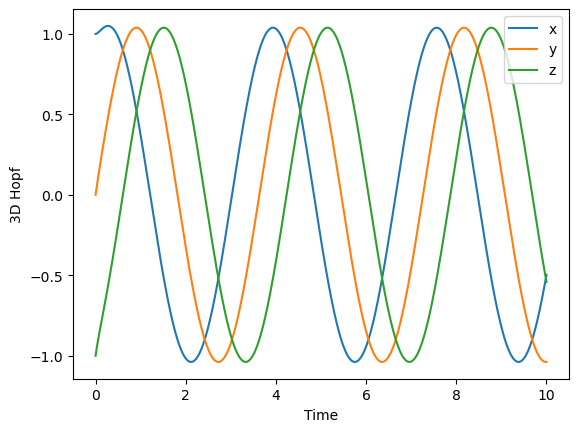

In [ ]:
# %%

#Question 2:
from Equations_Functions import hopf_bifurcation_3d

# (a) For β = 1, use a numerical integrator to calculate the solution for 0 ≤ t ≤ 10 with
# initial conditions x(0) = 1, y(0) = 0, and z(0) = −1. Plot the resulting time series
# as the trajectory converges onto a limit cycle, showing x, y, and z again

pars = [1] # beta
y0 = np.array([1, 0, -1])
T = 10
t = np.linspace(0, T, 1000)
sol = solve_ode(hopf_bifurcation_3d, y0, t, "rk4", 0.01, pars)

plt.plot(t, sol[0, :], label='x')
plt.plot(t, sol[1, :], label='y')
plt.plot(t, sol[2, :], label='z')
plt.xlabel('Time')
plt.ylabel('3D Hopf')
plt.legend()
plt.show()

The starting point: 1.03, 0.53, -0.53 values and period: 7.26 for the Hopf Bifurcation 3D orbit


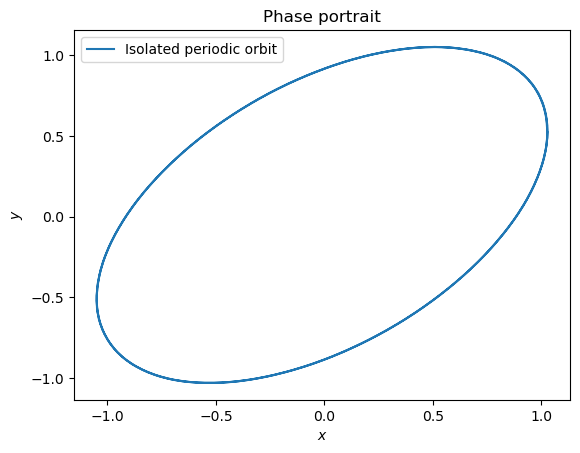

In [ ]:
# %%

# (b) For β = 1, use numerical shooting along with a suitable phase condition to identify
# the coordinates of a starting point along the limit cycle found in (a). Determine the
# oscillation period to two decimal places. Note: there are multiple co-existing limit
# cycles; ensure that you find the one matching the limit cycle in a).

from bvp_and_shooting import phase_condition, shoot, limit_cycle_finder, phase_portrait_plotter, orbit

pars = [1] # beta
y0 = np.array([1, 0, -1, 7])
sol = limit_cycle_finder(hopf_bifurcation_3d, y0,phase_condition,pars,test=False)
cycle = orbit(hopf_bifurcation_3d, sol[:-1], sol[-1], pars)
print(f'The starting point: {", ".join([f"{val:.2f}" for val in sol[:-1]])} values and period: {sol[-1]:.2f} for the Hopf Bifurcation 3D orbit')
fig1 = phase_portrait_plotter(cycle) #plot the limit cycle
plt.show()
# Need to verify that this is the limit cycle found in a)
# How to do this?

Parameter boundary reached or exceeded.


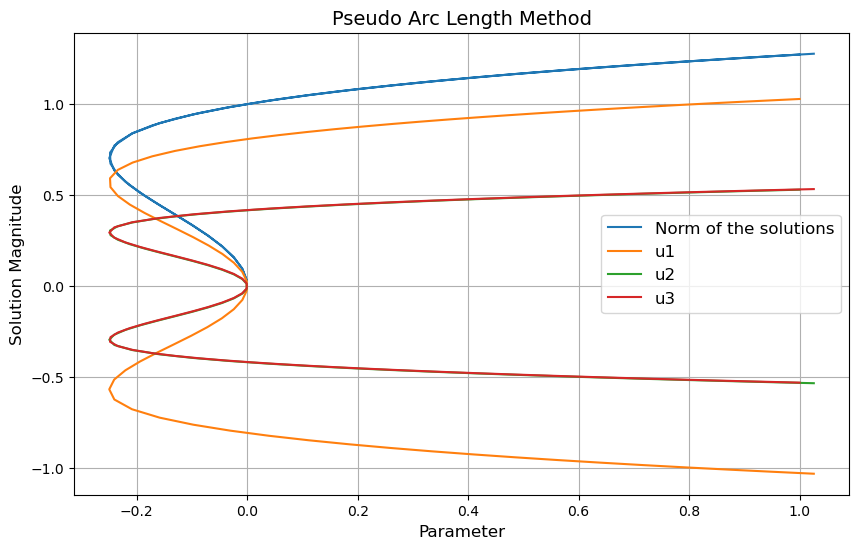

In [ ]:
# %%

# (c) For β ≤ 1, from the starting point found in (b) use pseudo-arclength continuation to
# find the branch of limit cycles that emerge from the Hopf bifurcation at β

x0 = sol #starting point from b) 
par_array = [2]  # Start parameter value - becomes redundant anyway as we start from max unless there are more parameters
par_index = 0

par_pseudo, sol_pseudo = numerical_continuation(hopf_bifurcation_3d, 
    'pseudo', 
    x0, 
    par_array, 
    par_index, 
    [1, -0.6], #Bounds affect the step size
    [200, 30], #Max steps: [PAL, Natural]. Also affects the step size  
    shoot, 
    fsolve, 
    phase_condition=phase_condition, 
    increase=False)

pseudo_plotter(par_pseudo, sol_pseudo, period=True)
#Solve_IVP is better than solve_ode in this case due to squared terms in the equations, means x0, bounds and step size need to be chosen carefully

Value of u(0) for dense: 0.3240
Value of u(0) for sparse: 0.4806


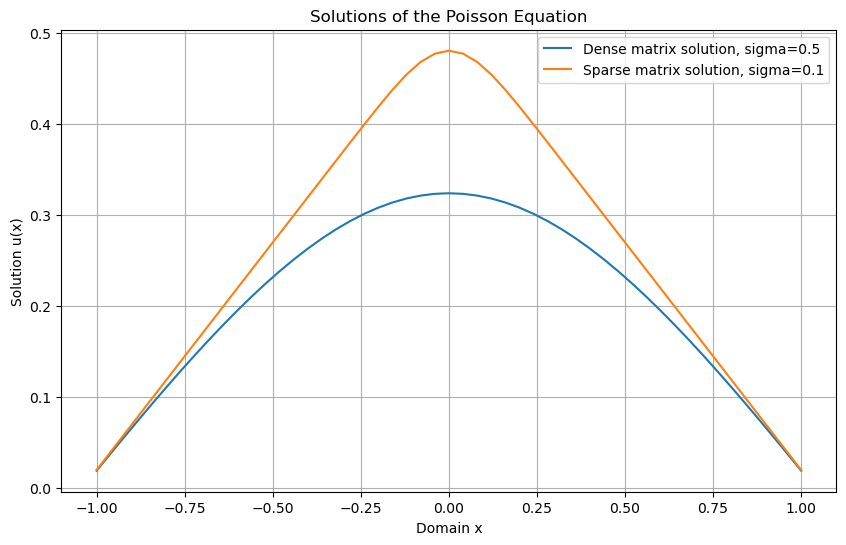

Value of u(0) for dense: 0.4821
Value of u(0) for sparse: 0.4821
Time taken for dense: 0.0126
Time taken for sparse: 0.0005


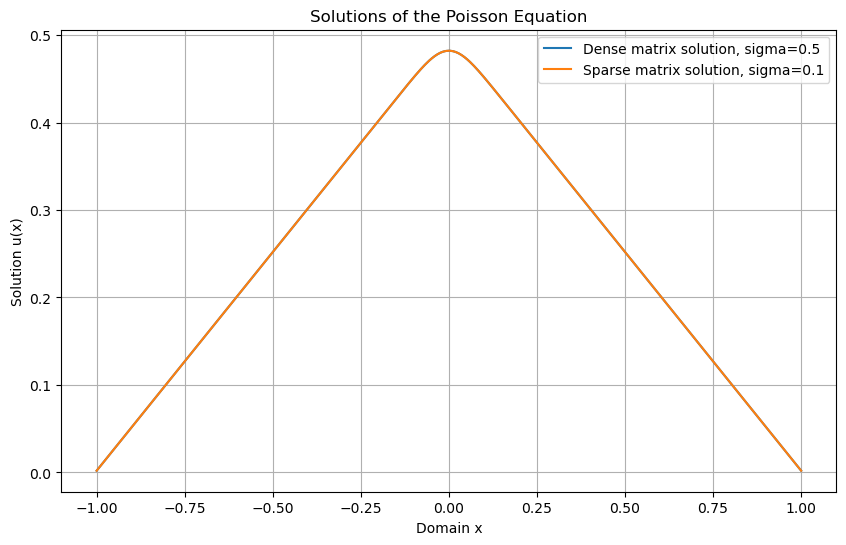

In [ ]:
# %%

#Question 3:
# a)  Use the finite difference method to solve the Poisson equation
#  Solve for u(x) using
# i. one of SciPy’s root-finding functions or using NumPy when σ = 0.5;
# ii. using SciPy with sparse matrices when σ = 0.1.
# In each case, use 51 equally spaced grid points to discretise the x variable. In each
# case, print the value of u(0) to the screen using at least four significant digits. Create
# a single figure that plots all of your solutions u(x).

from sparse_dense_bvp import solve_dense, solve_sparse, plot_solutions, setup_rhs_poisson
import numpy as np
from Diffusion_OO import BoundaryCondition
import time

equation_type_Q6 = 'convection-diffusion-reaction' #would need to set up a rhs function for this
    
no_points = 51
a = -1
b = 1
x = np.linspace(a, b, no_points)  # 501 points in the domain
dx = x[1] - x[0]  # Step size
dx = (b-a)/(no_points-1)

boundary_conditions = [
    BoundaryCondition('left', 'dirichlet', -1),
    BoundaryCondition('right', 'dirichlet', -1)
]
    
bc_left = boundary_conditions[0]
bc_right = boundary_conditions[1]

coefficients_possion_dense = {'D': 1.0, 'sigma': 0.5}
coefficients_possion_sparse = {'D': 1.0, 'sigma': 0.1}

u_dense = solve_dense(setup_rhs_poisson,domain=x, h=dx,bc_left=bc_left,bc_right=bc_right, coefficients=coefficients_possion_dense, equation_type='diffusion')
u_sparse = solve_sparse(setup_rhs_poisson,domain=x, h=dx, bc_left=bc_left, bc_right=bc_right, coefficients=coefficients_possion_sparse, equation_type='diffusion')
print(f'Value of u(0) for dense: {u_dense[25]:.4f}')
print(f'Value of u(0) for sparse: {u_sparse[25]:.4f}')

plot_solutions(x, u_dense, u_sparse)


# b)
# Now increase the number of grid points to 501 and set σ = 0.05. Solve the Poisson
# equation using the approaches from part (a) that you have implemented. In each
# case, time your code using the %timeit function. Explain which approach is faster


no_points = 501
x = np.linspace(a, b, no_points)  # 501 points in the domain
dx = x[1] - x[0]  # Step size
dx = (b-a)/(no_points-1)

coefficients_possion_dense = {'D': 1.0, 'sigma': 0.05}
coefficients_possion_sparse = {'D': 1.0, 'sigma': 0.05}

start_time = time.perf_counter()
u_dense = solve_dense(setup_rhs_poisson,
    domain=x, 
    h=dx,
    bc_left=bc_left,
    bc_right=bc_right, 
    coefficients=coefficients_possion_dense,
    equation_type='diffusion')
end_time = time.perf_counter()

time_dense = end_time - start_time

start_time = time.perf_counter()
u_sparse = solve_sparse(setup_rhs_poisson,
    domain=x, 
    h=dx, 
    bc_left=bc_left,
    bc_right=bc_right,
    coefficients=coefficients_possion_sparse,
    equation_type='diffusion')
end_time = time.perf_counter()

time_sparse = end_time - start_time

print(f'Value of u(0) for dense: {u_dense[250]:.4f}')
print(f'Value of u(0) for sparse: {u_sparse[250]:.4f}')
print(f'Time taken for dense: {time_dense:.4f}')
print(f'Time taken for sparse: {time_sparse:.4f}')

#Sparse is faster than dense, as expected. Sparse matrices are more efficient for large matrices. 

plot_solutions(x, u_dense, u_sparse)

dt MAX =0.0003921184197627684
u(0, T) at T = 0.5 is: -0.2552568155518023
u(0, T) at T = 0.5 is: -0.2550497192650939


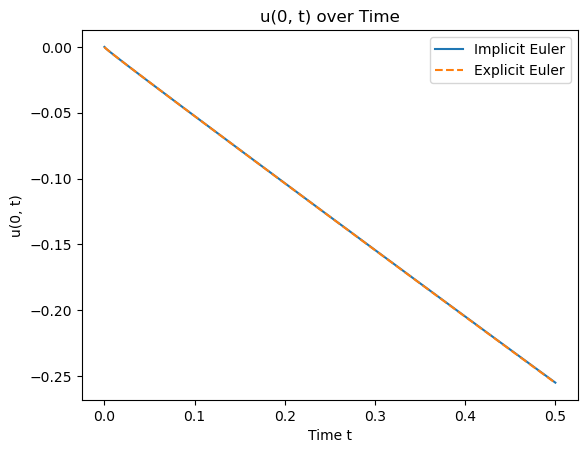

In [8]:
# %%
# Question 4 
from Diffusion_OO import DiffusionSimulation, BoundaryCondition
import numpy as np
import matplotlib.pyplot as plt

boundary_conditions = [
    BoundaryCondition('left', 'neumann', 1),
    BoundaryCondition('right', 'dirichlet', 0)
]

a = 0
b = 2
D = 0.5
N = 101
T = 0.5

def source_term(t, x, U):
    #Q5: ((1-U)**2)*np.exp(-x)
    #BRATU: np.exp(2*U)
    return 0*((1-U)**2)*np.exp(-x)

#Source term defined in the class
initial_condition = lambda x: 0.5*x*(2-x)
dt_max = ((b-a)/N)**2/ (2 * D)

dt = dt_max
print(f"dt MAX ={dt}")
explicit_simulation = DiffusionSimulation(source_term,a, b, D, initial_condition, boundary_conditions, N, (0, T), method='explicit_euler', dt=0.5*dt)
x_euler, t_eval_euler, U_euler = explicit_simulation.solve()

implicit_simulation = DiffusionSimulation(source_term,a, b, D, initial_condition, boundary_conditions, N, (0, T), method='implicit_euler_sparse', dt=2*dt)
x_imp, t_eval_imp, U_imp = implicit_simulation.solve()

idx_x0_exp = np.where(x_euler == 0)[0][0] #find index of x = 0
u_exp_x0 = U_euler[:, idx_x0_exp] #extract solution at x = 0 for all times
print(f"u(0, T) at T = {t_eval_euler[-1]} is: {u_exp_x0[-1]}") #print the value of u at x = 0 for the final time

idx_x0_imp = np.where(x_imp == 0)[0][0] #find index of x = 0
u_imp_x0 = U_imp[:, idx_x0_imp] #extract solution at x = 0 for all times
print(f"u(0, T) at T = {t_eval_imp[-1]} is: {u_imp_x0[-1]}") #print the value of u at x = 0 for the final time

plt.plot(t_eval_imp, u_imp_x0, label='Implicit Euler')
plt.plot(t_eval_euler, u_exp_x0, label='Explicit Euler',linestyle ='--') #plot u(0, t) for all t
plt.title('u(0, t) over Time')
plt.xlabel('Time t')
plt.ylabel('u(0, t)')
plt.legend()
plt.show()


Using dt=0.045
Time taken for Explicit Euler: 0.10004925727844238
Time taken for Implicit Euler Dense: 1.5034339427947998
Time taken for Implicit Euler Sparse: 0.4265711307525635
Time taken for Implicit Euler Root: 11.62790822982788
Value of u(L, T) for Explicit Euler: 0.3762
Value of u(L, T) for Implicit Euler Dense: 0.3762
Value of u(L, T) for Implicit Euler Sparse: 0.3762
Value of u(L, T) for Implicit Euler Root: 0.3634


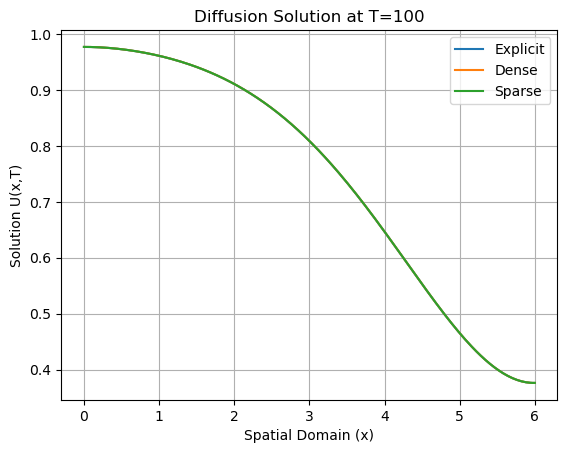

In [9]:
# %%

#Question 5:
# (a) Using a method (or methods) of your choice, compute and plot u(x, T) when D =
# 0.01, L = 6, and T = 100. You may solve this problem using a variety of methods
# to showcase any methods you have not demonstrated yet.
# (b) For each method that you implemented in part (a), time your code to determine
# the fastest method. If you had to solve the above problem 100 times, each using a
# different value of D, which numerical method would you choose and why?
# (c) For the same parameters as in part (a), compute u(L, T) using a method of your
# choice. Print this value to the screen using at least four significant figures. Your
# answer should be accurate to within four significant figures, i.e. the first four nonzero digits should be correct. Add a block of text that explains how you selected the
# numerical method.

from Diffusion_OO import DiffusionSimulation, BoundaryCondition
import numpy as np
import matplotlib.pyplot as plt
import time


boundary_conditions = [
    BoundaryCondition('left', 'neumann', 0),
    BoundaryCondition('right', 'neumann', 0)
]

a = 0
b = 6
D = 0.01
N = 200
T = 100

def source_term(t, x, U):
    #Q5: ((1-U)**2)*np.exp(-x)
    return ((1-U)**2)*np.exp(-x)

initial_condition = lambda x: x*0

dt_max = ((b-a)/N)**2/ (2 * D)
dt = dt_max


print(f"Using dt={dt}")
exp_simulation = DiffusionSimulation(source_term,a, b, D, initial_condition, boundary_conditions, N, (0, T), method='explicit_euler', dt=0.5*dt)
start = time.time()
x_exp, t_exp, U_exp = exp_simulation.solve()
end = time.time()
explicit_time = end-start
print(f"Time taken for Explicit Euler: {explicit_time}")


imp_dense_simulation = DiffusionSimulation(source_term,a, b, D, initial_condition, boundary_conditions, N, (0, T), method='implicit_euler_dense', dt=4*dt)
start = time.time()
x_imp_dense, t_imp_dense, U_imp_dense = imp_dense_simulation.solve()
end = time.time()
implicit_dense_time = end-start
print(f"Time taken for Implicit Euler Dense: {implicit_dense_time}")


imp_sparse_simulation = DiffusionSimulation(source_term,a, b, D, initial_condition, boundary_conditions, N, (0, T), method='implicit_euler_sparse', dt=4*dt)
start = time.time()
x_imp_sparse, t_imp_sparse, U_imp_sparse = imp_sparse_simulation.solve()
end = time.time()
implicit_sparse_time = end-start
print(f"Time taken for Implicit Euler Sparse: {implicit_sparse_time}")

imp_root_simulation = DiffusionSimulation(source_term,a, b, D, initial_condition, boundary_conditions, N, (0, T), method='implicit_euler_root', dt=4*dt)
start = time.time()
x_imp_root, t_imp_root, U_imp_root = imp_root_simulation.solve()
end = time.time()
implicit_root_time = end-start
print(f"Time taken for Implicit Euler Root: {implicit_root_time}")

print(f"Value of u(L, T) for Explicit Euler: {U_exp[-1][-1]:.4f}"
f"\nValue of u(L, T) for Implicit Euler Dense: {U_imp_dense[-1][-1]:.4f}"
f"\nValue of u(L, T) for Implicit Euler Sparse: {U_imp_sparse[-1][-1]:.4f}"
f"\nValue of u(L, T) for Implicit Euler Root: {U_imp_root[-1][-1]:.4f}")
#All bar Implicit Root method are within 4sig figs

plt.plot(x_exp, U_exp[-1], label='Explicit')
plt.plot(x_imp_dense, U_imp_dense[-1], label='Dense')
plt.plot(x_imp_sparse, U_imp_sparse[-1], label='Sparse')
#plt.plot(x_imp_root, U_imp_root[-1], label=' Root ')

plt.xlabel('Spatial Domain (x)')
plt.ylabel('Solution U(x,T)')
plt.title('Diffusion Solution at T=100')
plt.legend()
plt.grid(True)
plt.show()

Max dense solution: 0.999653
Max sparse solution: 0.999653


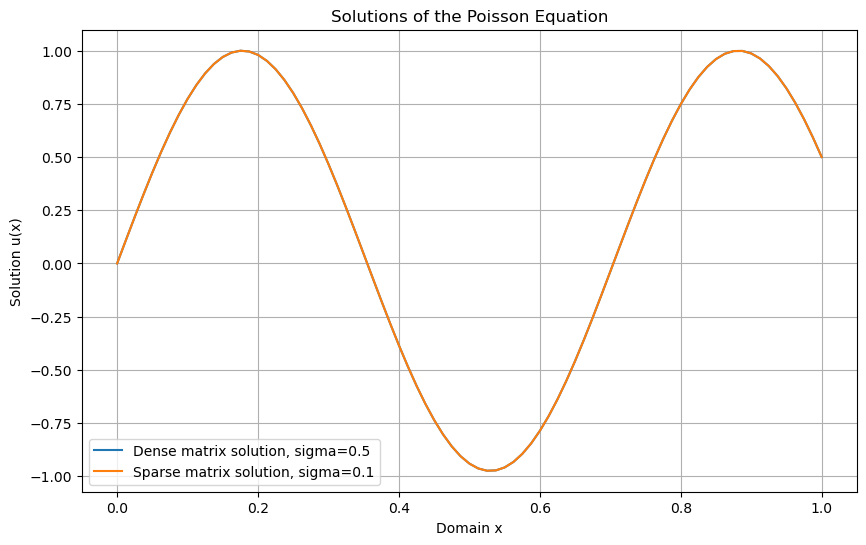

Max dense solution: 0.755862
Max sparse solution: 0.755862


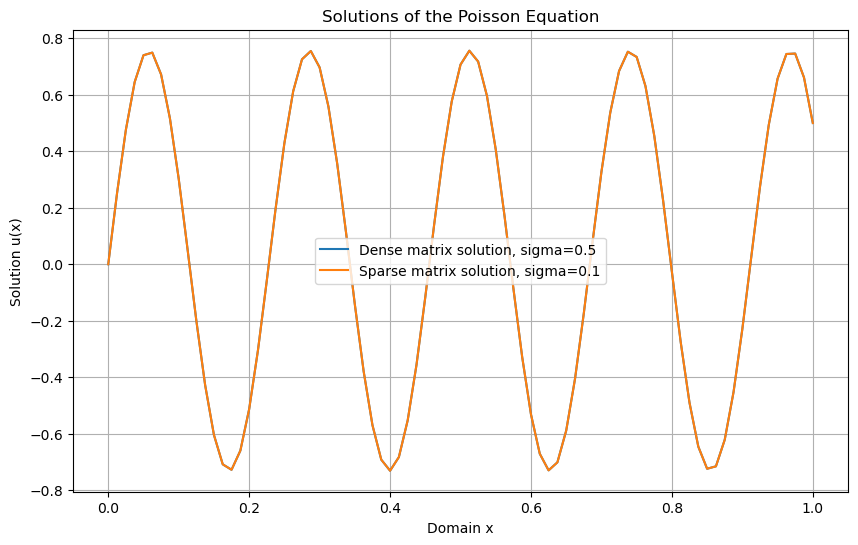

Max dense solution: 2.730909
Max sparse solution: 2.730909


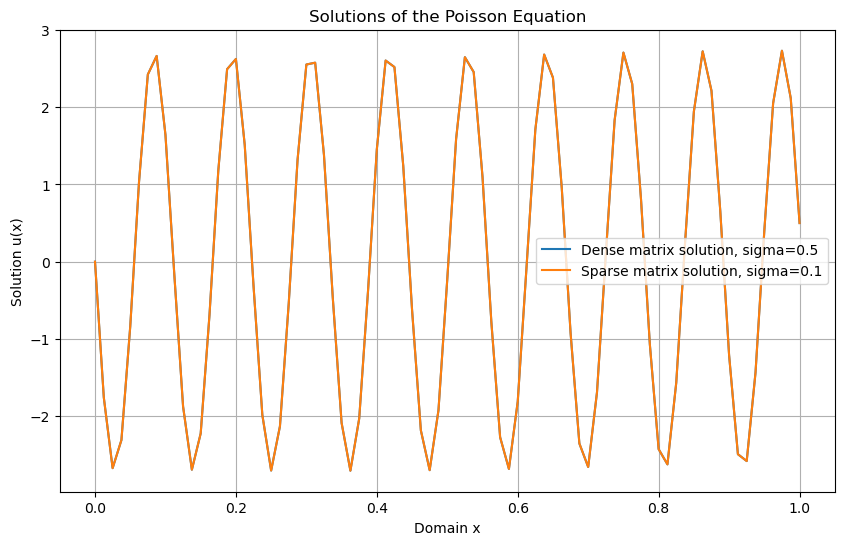

In [1]:
#Question 6
from sparse_dense_bvp import solve_dense, solve_sparse, plot_solutions, setup_rhs_reaction
import numpy as np
from Diffusion_OO import BoundaryCondition

equation_type_Q6 = 'convection-diffusion-reaction' #would need to set up a rhs function for this

no_points = 81
a = 0
b = 1
x = np.linspace(a, b, no_points)  # 501 points in the domain
dx = x[1] - x[0]  # Step size
dx = (b-a)/(no_points-1)


boundary_conditions = [
BoundaryCondition('left', 'dirichlet', 0),
BoundaryCondition('right', 'dirichlet', 0.5)
]

bc_left = boundary_conditions[0]
bc_right = boundary_conditions[1]
#P = 1
coefficients_P1 = {'D': 1.0, 'P': 1, 'R': 1}
u_dense = solve_dense(setup_rhs_reaction,domain=x, h=dx,bc_left=bc_left,bc_right=bc_right, coefficients=coefficients_P1, equation_type=equation_type_Q6)
u_sparse = solve_sparse(setup_rhs_reaction,domain=x, h=dx, bc_left=bc_left, bc_right=bc_right, coefficients=coefficients_P1, equation_type=equation_type_Q6)
print(f"Max dense solution: {max(u_dense):5f}")
print(f"Max sparse solution: {max(u_sparse):5f}")
plot_solutions(x, u_dense, u_sparse)

#P = 10
coefficients_P2 = {'D': 1.0, 'P': 10, 'R': 10}
u_dense = solve_dense(setup_rhs_reaction,domain=x, h=dx,bc_left=bc_left,bc_right=bc_right, coefficients=coefficients_P2, equation_type=equation_type_Q6)
u_sparse = solve_sparse(setup_rhs_reaction,domain=x, h=dx, bc_left=bc_left, bc_right=bc_right, coefficients=coefficients_P2, equation_type=equation_type_Q6)
print(f"Max dense solution: {max(u_dense):5f}")
print(f"Max sparse solution: {max(u_sparse):5f}")
plot_solutions(x, u_dense, u_sparse)

#P = 50
coefficients_P3 = {'D': 1.0, 'P': 50, 'R': 50}
u_dense = solve_dense(setup_rhs_reaction,domain=x, h=dx,bc_left=bc_left,bc_right=bc_right, coefficients=coefficients_P3, equation_type=equation_type_Q6)
u_sparse = solve_sparse(setup_rhs_reaction,domain=x, h=dx, bc_left=bc_left, bc_right=bc_right, coefficients=coefficients_P3, equation_type=equation_type_Q6)
print(f"Max dense solution: {max(u_dense):5f}")
print(f"Max sparse solution: {max(u_sparse):5f}")
plot_solutions(x, u_dense, u_sparse)